In [2]:
import numpy as np

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score


e:\Installation\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [5]:
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [6]:
data=pd.read_excel('prothom_alo_1.xlsx')
data

,Name,Profile ID,Date,Comment,Category
0,Md Sohorab Munsi,ID: 100003883864232,2022-09-08 10:37:13,ইলিশের মূল্য চুকাতে হবে না?? এত কম মূল্যে ইলিশ...,3
1,Md Eleaus Mia,ID: 100009038460644,2022-09-08 10:37:26,ভারত সফরের পুরস্কার😢😢,1
2,Ashiq Mollik,ID: 100007295678324,2022-09-08 10:37:31,"কি অবস্থা , আমাদের প্রধানমন্ত্রী still kno...",3
3,MD Abubakkar Siddik,ID: 100034887287306,2022-09-08 10:37:35,তাও আবার লাশ ওরাই ময়নাতদন্ত করবে?,1
4,Obaidur Rahman,ID: 100003165530059,2022-09-08 10:37:41,তার সফর উপলক্ষে উপহার,6
...,...,...,...,...,...
94,Md Arif Mirdha,ID: 100007330626442,2022-09-08 10:50:16,ওহ আল্লাহ তুমি কি দেখো না,1
95,Nayeem Rahman,ID: 100009512499575,2022-09-08 10:50:31,আমরা ইলিশ উপহার দিলাম আর ওরা লাশ উপহার দিলো। ধ...,3
96,Shahadat Hossain Saddam,ID: 100005144534859,2022-09-08 10:50:36,"চিন্তা করা যায়,পাখির মত মেনে ফেলে বাংলাদেশ আঙ্...",3
97,Fakhrul Islam,ID: 100007702720149,2022-09-08 10:50:37,বাংলাদেশ-ভারত ভাই-ভাই।,3


In [7]:
data.columns

Index(['Name ', 'Profile ID', 'Date', 'Comment', 'Category'], dtype='object')

In [8]:
len(data)

99

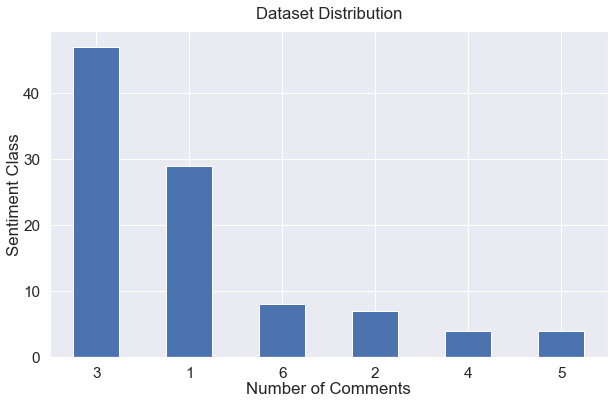

In [9]:
sns.set(font_scale=1.4)
data['Category'].value_counts().plot(kind= 'bar' , figsize=(10,6), rot=0)
plt.xlabel("Number of Comments", labelpad=1)
plt.ylabel("Sentiment Class", labelpad=1)
plt.yticks(rotation = 0)
plt.title("Dataset Distribution", y=1.02);


In [10]:
# Data cleaning function
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    return Comment

In [11]:
data['cleaned']=data['Comment'].apply(process_comments)

In [12]:
data

,Name,Profile ID,Date,Comment,Category,cleaned
0,Md Sohorab Munsi,ID: 100003883864232,2022-09-08 10:37:13,ইলিশের মূল্য চুকাতে হবে না?? এত কম মূল্যে ইলিশ...,3,ইলিশের মূল্য চুকাতে হবে না এত কম মূল্যে ইলিশ...
1,Md Eleaus Mia,ID: 100009038460644,2022-09-08 10:37:26,ভারত সফরের পুরস্কার😢😢,1,ভারত সফরের পুরস্কার
2,Ashiq Mollik,ID: 100007295678324,2022-09-08 10:37:31,"কি অবস্থা , আমাদের প্রধানমন্ত্রী still kno...",3,কি অবস্থা আমাদের প্রধানমন্ত্রী ...
3,MD Abubakkar Siddik,ID: 100034887287306,2022-09-08 10:37:35,তাও আবার লাশ ওরাই ময়নাতদন্ত করবে?,1,তাও আবার লাশ ওরাই ময়নাতদন্ত করবে
4,Obaidur Rahman,ID: 100003165530059,2022-09-08 10:37:41,তার সফর উপলক্ষে উপহার,6,তার সফর উপলক্ষে উপহার
...,...,...,...,...,...,...
94,Md Arif Mirdha,ID: 100007330626442,2022-09-08 10:50:16,ওহ আল্লাহ তুমি কি দেখো না,1,ওহ আল্লাহ তুমি কি দেখো না
95,Nayeem Rahman,ID: 100009512499575,2022-09-08 10:50:31,আমরা ইলিশ উপহার দিলাম আর ওরা লাশ উপহার দিলো। ধ...,3,আমরা ইলিশ উপহার দিলাম আর ওরা লাশ উপহার দিলো ধ...
96,Shahadat Hossain Saddam,ID: 100005144534859,2022-09-08 10:50:36,"চিন্তা করা যায়,পাখির মত মেনে ফেলে বাংলাদেশ আঙ্...",3,চিন্তা করা যায় পাখির মত মেনে ফেলে বাংলাদেশ আঙ্...
97,Fakhrul Islam,ID: 100007702720149,2022-09-08 10:50:37,বাংলাদেশ-ভারত ভাই-ভাই।,3,বাংলাদেশ ভারত ভাই ভাই


In [13]:
data['length']=data['cleaned'].apply(lambda x: len(x.split()))

In [14]:
data['length']

0     15
1      3
2      7
3      6
4      4
      ..
94     6
95    24
96    11
97     4
98     1
Name: length, Length: 99, dtype: int64

In [15]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Category.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Category==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Category==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Category==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

In [16]:
documents,words,u_words,class_names = data_summary(data)


Class Name :  3
Number of Documents:47
Number of Words:547
Number of Unique Words:362
Most Frequent Words:

উপহার	18
আমাদের	13
ইলিশ	9
লাশ	8
ভারত	7
করে	7
ইলিশের	6
না	6
কোন	6
আমরা	5

Class Name :  1
Number of Documents:29
Number of Words:310
Number of Unique Words:203
Most Frequent Words:

না	10
আর	7
হবে	6
ভারত	5
দেশের	5
এই	4
সীমান্ত	4
করে	4
তার	4
কি	4

Class Name :  6
Number of Documents:8
Number of Words:57
Number of Unique Words:55
Most Frequent Words:

উপহার	2
সফরের	2
তার	1
সফর	1
উপলক্ষে	1
ইলিশের	1
সামি	1
স্ত্রীর	1
এতো	1
মিল	1

Class Name :  2
Number of Documents:7
Number of Words:34
Number of Unique Words:32
Most Frequent Words:

কি	2
কেনো	2
সীমান্ত	1
হত্যা	1
নিয়ে	1
আলোচনা	1
এবার	1
হলো	1
আপনাদের	1
হাত	1

Class Name :  4
Number of Documents:4
Number of Words:57
Number of Unique Words:53
Most Frequent Words:

মা	3
বাংলাদেশ	2
মতো	2
মুদির	1
বউ	1
ভারতে	1
ইলিশ	1
পাঠাইয়া	1
কার	1
বা	1

Class Name :  5
Number of Documents:4
Number of Words:16
Number of Unique Words:16
Most Frequent Words:


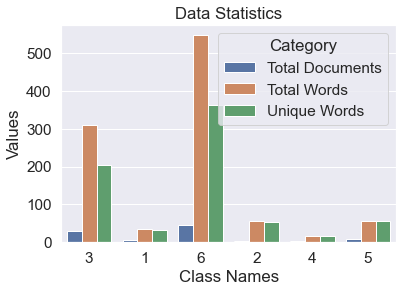

In [17]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=0, ha="center");

In [18]:
data['ReviewLength'] = data.cleaned.apply(lambda x:len(x.split()))

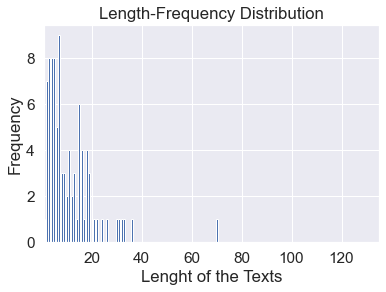

Maximum Length of a review: 70
Minimum Length of a review: 0
Average Length of a reviews: 10.0


In [19]:
frequency = dict()
for i in data.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(data.ReviewLength)}")
print(f"Minimum Length of a review: {min(data.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(data.ReviewLength),0)}")

In [21]:


#==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)

    return labels

In [22]:

                           #===========================================================
                           ################# Dataset Splitting Function ###############
                           #=========================================================== 

def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [23]:


data.cleaned = data.cleaned.apply(lambda x:x.replace('\n',' '))



In [24]:
data.cleaned

0     ইলিশের মূল্য চুকাতে হবে না   এত কম মূল্যে ইলিশ...
1                                 ভারত সফরের পুরস্কার  
2     কি  অবস্থা    আমাদের  প্রধানমন্ত্রী           ...
3                     তাও আবার লাশ ওরাই ময়নাতদন্ত করবে 
4                                 তার সফর উপলক্ষে উপহার
                            ...                        
94                            ওহ আল্লাহ তুমি কি দেখো না
95    আমরা ইলিশ উপহার দিলাম আর ওরা লাশ উপহার দিলো  ধ...
96    চিন্তা করা যায় পাখির মত মেনে ফেলে বাংলাদেশ আঙ্...
97                               বাংলাদেশ ভারত ভাই ভাই 
98                                      ইন্নালিল্লাহ   
Name: cleaned, Length: 99, dtype: object

In [25]:


#======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================
            
def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve